<a href="https://colab.research.google.com/github/SuryaPrakash432/Recommendation-System-for-E-commerce/blob/main/Recommendation_System_for_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Install Necessary Libraries:**

In [30]:
!pip install pandas numpy scikit-learn matplotlib

**Load Data:**

In [31]:
import pandas as pd
import numpy as np

# Sample dataset with 200 rows
data = {
    'user_id': np.random.randint(1, 21, size=200),
    'product_id': np.random.randint(1, 21, size=200),
    'rating': np.random.randint(1, 6, size=200)
}

df = pd.DataFrame(data)

# the first lines in the dataframe
df.head()


,user_id,product_id,rating
0,11,6,4
1,11,12,4
2,18,14,1
3,15,20,4
4,4,15,1


**Data Preprocessing:**

In [32]:
df = df.drop_duplicates()
# Check for missing values
df.isnull().sum()

,0
user_id,0
product_id,0
rating,0


**Collaborative Filtering (Using Cosine Similarity):**

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Create a user-product matrix (pivot table)
user_product_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# Cosine similarity between users
similarity_matrix = cosine_similarity(user_product_matrix)

# Convert similarity matrix to DataFrame for better readability
similarity_df = pd.DataFrame(similarity_matrix, index=user_product_matrix.index, columns=user_product_matrix.index)

# Display the similarity matrix
similarity_df.head()


user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
user_id,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.220665,0.470087,0.068752,0.273810,0.273893,0.347542,0.250165,0.587378,0.431431,0.664050,0.230921,0.374829,0.167473,0.436350,0.202031,0.323736,0.276080,0.325449,0.463942
2,0.220665,1.000000,0.420940,0.320135,0.326200,0.243214,0.297061,0.041356,0.266272,0.266565,0.327584,0.189547,0.065314,0.359914,0.459945,0.318851,0.513248,0.228590,0.422830,0.393281
3,0.470087,0.420940,1.000000,0.438763,0.246915,0.279183,0.428466,0.327487,0.497851,0.507641,0.452677,0.317253,0.436393,0.440086,0.291730,0.503639,0.169346,0.256439,0.500356,0.394771
4,0.068752,0.320135,0.438763,1.000000,0.000000,0.234339,0.270320,0.032929,0.000000,0.221476,0.681781,0.131715,0.026003,0.101144,0.000000,0.388922,0.027244,0.058244,0.000000,0.000000
5,0.273810,0.326200,0.246915,0.000000,1.000000,0.365191,0.435305,0.547369,0.061185,0.316383,0.032196,0.521711,0.256640,0.197028,0.581800,0.622927,0.452877,0.516862,0.236691,0.371154


**Generate Recommendations Based on User Similarity:**

In [38]:
def get_similar_users(user_id, top_n=5):
    # Get the most similar users to the given user_id
    similar_users = similarity_df[user_id].sort_values(ascending=False)[1:top_n+1]
    return similar_users

def recommend_products(user_id, top_n=5):
    similar_users = get_similar_users(user_id, top_n)
    recommended_products = []

    for similar_user in similar_users.index:
        # Get products rated by similar users
        products_rated_by_similar_user = user_product_matrix.loc[similar_user][user_product_matrix.loc[similar_user] > 0].index.tolist()
        for product in products_rated_by_similar_user:
            if product not in user_product_matrix.loc[user_id][user_product_matrix.loc[user_id] > 0].index.tolist():
                recommended_products.append(product)

    return list(set(recommended_products))[:top_n]

# Example: Recommend products for user 5
recommend_products(user_id=5)


[1, 2, 3, 5, 6]

**Content-Based Filtering:**

In [40]:
# Sample product data (for simplicity, including only category and price)
# Ensure that the length of all arrays is the same (20 products)
product_data = pd.DataFrame({
    'product_id': np.arange(1, 21),  # 20 unique products
    'category': ['Electronics', 'Clothing', 'Home', 'Beauty', 'Sports', 'Toys', 'Food', 'Furniture', 'Books', 'Music'] * 2,  # 10 categories repeated twice
    'price': np.random.randint(10, 100, size=20)  # 20 random prices between 10 and 100
})

# Preview the product data
product_data.head()


# Merge product data with ratings data
df = pd.merge(df, product_data, on='product_id')

def recommend_products_based_on_content(user_id, top_n=5):
    user_data = df[df['user_id'] == user_id]
    recommended_products = []

    for index, row in user_data.iterrows():
        category = row['category']
        recommended_products.extend(df[(df['category'] == category) & (df['user_id'] != user_id)]['product_id'].unique())

    return list(set(recommended_products))[:top_n]

# Example: Recommend content-based products for user 5
recommend_products_based_on_content(user_id=5)


[1, 4, 8, 10, 11]

**Hybrid Filtering (Combining Collaborative & Content-Based):**

In [41]:
def hybrid_recommendation(user_id, top_n=5):
    collab_recs = recommend_products(user_id, top_n)
    content_recs = recommend_products_based_on_content(user_id, top_n)
    return list(set(collab_recs + content_recs))[:top_n]

# Example: Get hybrid recommendations for user 5
hybrid_recommendation(user_id=5)


[1, 2, 3, 4, 5]

**UI/UX Design for Recommendations:**

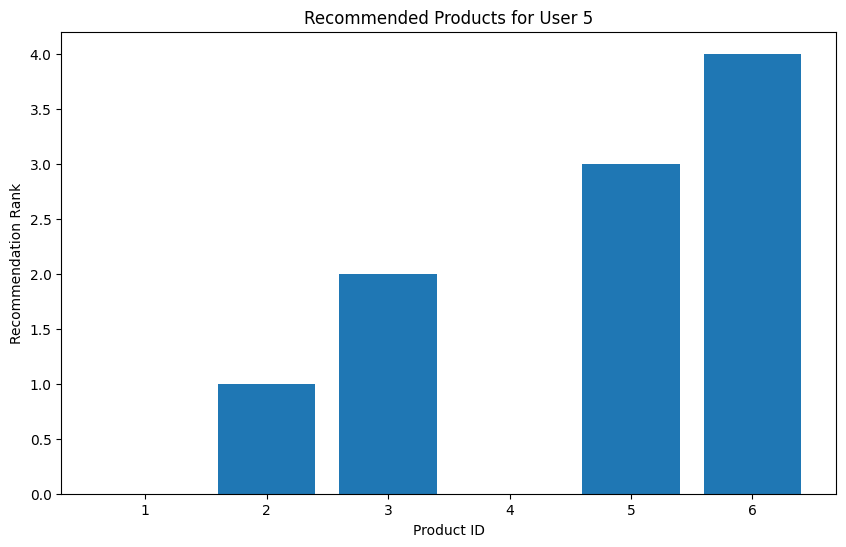

In [42]:
import matplotlib.pyplot as plt

def plot_recommendations(user_id):
    recommended_products = recommend_products(user_id, top_n=5)
    plt.figure(figsize=(10, 6))
    plt.bar(recommended_products, range(len(recommended_products)))
    plt.xlabel('Product ID')
    plt.ylabel('Recommendation Rank')
    plt.title(f"Recommended Products for User {user_id}")
    plt.show()

plot_recommendations(user_id=5)
